<img src='https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png' width="800">

# Overview of Pyleoclim: Efficient & Flexible Timeseries Analysis

## Authors

Deborah Khider1, Julien Emile-Geay2, Alexander James2, Feng Zhu3

1 Information Sciences Institute, University of Southern California 2 Department of Earth Sciences, University of Southern California 3 Nanjing University of Information Science and Technology

Author1 = {"name": "Deborah Khider", "affiliation": "Information Sciences Institute, University of Southern California", "email": "khider@usc.edu", "orcid": "0000-0001-7501-8430"}
Author2 = {"name": "Julien Emile-Geay", "affiliation": "Department of Earth Sciences, University of Southern California", "email": "julieneg@usc.edu", "orcid": "0000-0001-5920-4751"}
Author3 = {"name": "Alexander James", "affiliation": "Department of Earth Sciences, University of Southern California", "email": "akjames@usc.edu", "orcid": "0000-0001-8561-3188"}
Author4 = {"name": "Feng Zhu", "affiliation": "Nanjing University of Information Science and Technology", "email": "fzhu@nuist.edu", "orcid": "0000-0002-9969-2953"}

## Preamble

### Goals:

* Get acquainted with the Pyleoclim package, namely the objects and their associated methods
* Learn to create a Series object from a csv file
* Call the default methods for plotting, spectral and wavelet analysis
* Construct workflows with Pyleoclim


**Reading Time:**

10 minutes

### Keywords

Visualization; Signal Processing; Spectral Analysis; Wavelet Analysis; Method Cascading

### Pre-requisites

None. This tutorial assumes basic knowledge of Python. If you are not familiar with this coding language, check out this tutorial: http://linked.earth/ec_workshops_py/.

### Relevant Packages

Pandas; Matplotlib

## Data Description

Sea-surface temperature from [Kaplan (1998)](https://psl.noaa.gov/data/gridded/data.kaplan_sst.html) averaged over the NINO3 (5N-5S, 150W-190E)) region.


## Demonstration

Let's import the packages needed for this tutorial:

In [1]:
import pyleoclim as pyleo
import pandas as pd

### Step 1: Create a `Series` object from a csv file

To do so, we will first read the data from a csv file and load into a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html):

In [2]:
df = pd.read_csv('../data/wtc_test_data_nino_even.csv')
df.head()

,t,air,nino
0,1871.000000,87.36090,-0.358250
1,1871.083333,-21.83460,-0.292458
2,1871.166667,-5.52632,-0.143583
3,1871.250000,75.73680,-0.149625
4,1871.333333,105.82000,-0.274250


Next we create a `Series` object from the columns of the `DataFrame`:

In [3]:
ts_nino = pyleo.Series(time =  df['t'], value = df['nino'], label = 'Kaplan Niño3 SST',
                  time_name = 'Year', value_name = 'NINO3 index',
                  time_unit = 'CE',   value_unit = '$^{\circ}$C')            

Let's make a simple plot. You can learn to customize this plot in the `publication_ready_figures.ipynb` tutorial:

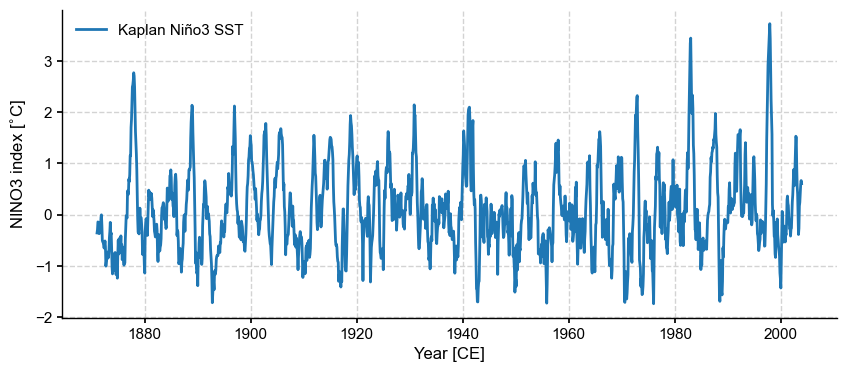

In [4]:
fig, ax = ts_nino.plot()

### Step 2: Pre-processing

Pyleoclim has multiple functionalities to pre-process a timeseries, including standardizing, detrending, interpolation. You can learn about the various pre-processing steps in the `L0_basic_ts_manipulation.ipynb`, `L1_filtering_and_detrending.ipynb`,  and `L1_uniform_time_sampling.ipynb` tutorials. As an example of one treatment, let's standardize the data and plot it against the original values. 

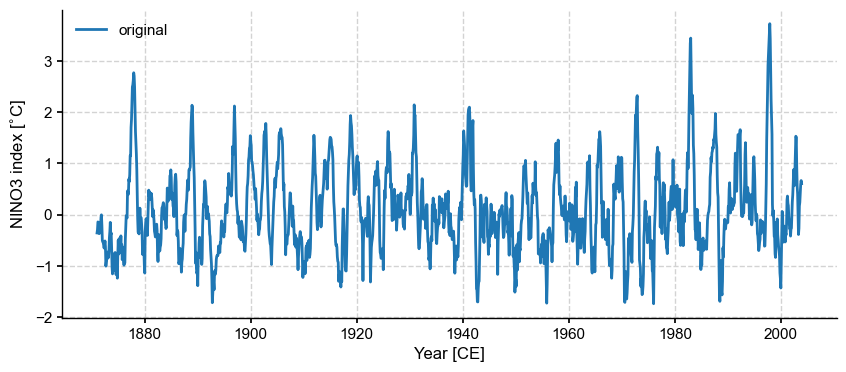

In [5]:
ts_nino_std = ts_nino.standardize()

fig, ax = ts_nino.plot(label='original', zorder=99) # a high zorder ensures this is plotted on top
ax = ts_nino_std.plot(label='standardized', ax=ax, lgd_kwargs={'ncol': 2})

For more on graphics customizations,  see *L1_figures_with_multiple_panels.ipynb*, *L1_publication_read_figures.ipynb*

### Step 3: Spectral Analysis

Pyleoclim makes it simple to perform spectral analysis. Calling the `.spectral()` method will yield a `PSD` (power spectral density) object of the corresponding series. Unless specified otherwise, `.spectral()` uses the Lomb-Scargle periodogram (`method='lomb_scargle`), which can handle both evenly-spaced data and unevenly-spaced data with great speed. However, it has known biases,  so it may be appropriate to specify an alternative method, like the Multi-Taper Method, which can only handle evenly-spaced data.  For our example data, both methods apply.

In [6]:
psd_wwz = ts_nino_std.spectral()  # method='lomb-scargle' by default 
psd_mtm = ts_nino_std.spectral(method='mtm')  # method='mtm' 

We can then plot the results of our analyses on the same figure:

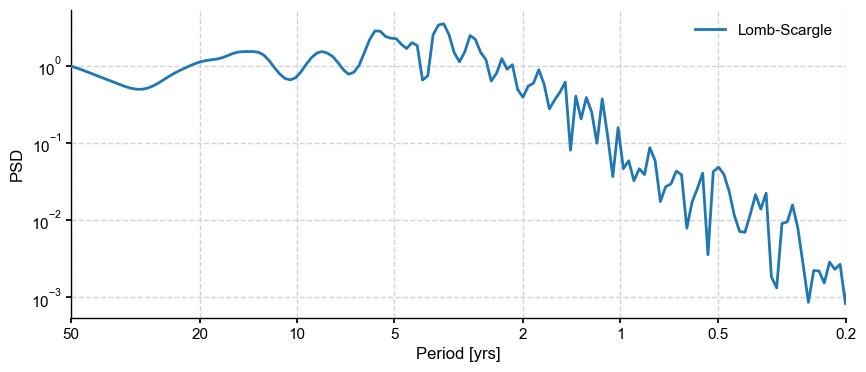

In [7]:
fig, ax = psd_wwz.plot(label='Lomb-Scargle',zorder=99)
ax = psd_mtm.plot(ax=ax, label='MTM')

To identify notable periodicities, we need to perform some significance test.
Currently, *Pyleoclim* supports the test against an AR(1) benchmark, which can be performed by simply calling the `signif_test()` method, which uses 200 surrogate series by default:

In [8]:
psd_mtm_signif = ts_nino_std.spectral(method='mtm').signif_test()

Performing spectral analysis on individual series:   0%|                                                                 | 0/200 [00:00<?, ?it/s]

Performing spectral analysis on individual series:   2%|▊                                                        | 3/200 [00:00<00:09, 21.60it/s]

Performing spectral analysis on individual series:   3%|█▋                                                       | 6/200 [00:00<00:08, 22.19it/s]

Performing spectral analysis on individual series:   4%|██▌                                                      | 9/200 [00:00<00:08, 22.32it/s]

Performing spectral analysis on individual series:   6%|███▎                                                    | 12/200 [00:00<00:08, 22.42it/s]

Performing spectral analysis on individual series:   8%|████▏                                                   | 15/200 [00:00<00:08, 22.29it/s]

Performing spectral analysis on individual series:   9%|█████                                                   | 18/200 [00:00<00:08, 22.28it/s]

Performing spectral analysis on individual series:  10%|█████▉                                                  | 21/200 [00:00<00:08, 21.90it/s]

Performing spectral analysis on individual series:  12%|██████▋                                                 | 24/200 [00:01<00:08, 21.85it/s]

Performing spectral analysis on individual series:  14%|███████▌                                                | 27/200 [00:01<00:07, 21.87it/s]

Performing spectral analysis on individual series:  15%|████████▍                                               | 30/200 [00:01<00:07, 21.95it/s]

Performing spectral analysis on individual series:  16%|█████████▏                                              | 33/200 [00:01<00:07, 22.10it/s]

Performing spectral analysis on individual series:  18%|██████████                                              | 36/200 [00:01<00:07, 22.34it/s]

Performing spectral analysis on individual series:  20%|██████████▉                                             | 39/200 [00:01<00:07, 22.59it/s]

Performing spectral analysis on individual series:  21%|███████████▊                                            | 42/200 [00:01<00:07, 22.50it/s]

Performing spectral analysis on individual series:  22%|████████████▌                                           | 45/200 [00:02<00:06, 22.41it/s]

Performing spectral analysis on individual series:  24%|█████████████▍                                          | 48/200 [00:02<00:06, 22.43it/s]

Performing spectral analysis on individual series:  26%|██████████████▎                                         | 51/200 [00:02<00:06, 22.41it/s]

Performing spectral analysis on individual series:  27%|███████████████                                         | 54/200 [00:02<00:06, 22.00it/s]

Performing spectral analysis on individual series:  28%|███████████████▉                                        | 57/200 [00:02<00:06, 21.97it/s]

Performing spectral analysis on individual series:  30%|████████████████▊                                       | 60/200 [00:02<00:06, 21.80it/s]

Performing spectral analysis on individual series:  32%|█████████████████▋                                      | 63/200 [00:02<00:06, 21.77it/s]

Performing spectral analysis on individual series:  33%|██████████████████▍                                     | 66/200 [00:02<00:06, 22.13it/s]

Performing spectral analysis on individual series:  34%|███████████████████▎                                    | 69/200 [00:03<00:05, 22.27it/s]

Performing spectral analysis on individual series:  36%|████████████████████▏                                   | 72/200 [00:03<00:05, 22.20it/s]

Performing spectral analysis on individual series:  38%|█████████████████████                                   | 75/200 [00:03<00:05, 22.32it/s]

Performing spectral analysis on individual series:  39%|█████████████████████▊                                  | 78/200 [00:03<00:05, 22.10it/s]

Performing spectral analysis on individual series:  40%|██████████████████████▋                                 | 81/200 [00:03<00:05, 22.14it/s]

Performing spectral analysis on individual series:  42%|███████████████████████▌                                | 84/200 [00:03<00:05, 22.08it/s]

Performing spectral analysis on individual series:  44%|████████████████████████▎                               | 87/200 [00:03<00:05, 21.88it/s]

Performing spectral analysis on individual series:  45%|█████████████████████████▏                              | 90/200 [00:04<00:05, 21.94it/s]

Performing spectral analysis on individual series:  46%|██████████████████████████                              | 93/200 [00:04<00:04, 21.99it/s]

Performing spectral analysis on individual series:  48%|██████████████████████████▉                             | 96/200 [00:04<00:04, 22.02it/s]

Performing spectral analysis on individual series:  50%|███████████████████████████▋                            | 99/200 [00:04<00:04, 21.83it/s]

Performing spectral analysis on individual series:  51%|████████████████████████████                           | 102/200 [00:04<00:04, 21.90it/s]

Performing spectral analysis on individual series:  52%|████████████████████████████▉                          | 105/200 [00:04<00:04, 21.80it/s]

Performing spectral analysis on individual series:  54%|█████████████████████████████▋                         | 108/200 [00:04<00:04, 21.90it/s]

Performing spectral analysis on individual series:  56%|██████████████████████████████▌                        | 111/200 [00:05<00:04, 21.75it/s]

Performing spectral analysis on individual series:  57%|███████████████████████████████▎                       | 114/200 [00:05<00:03, 21.75it/s]

Performing spectral analysis on individual series:  58%|████████████████████████████████▏                      | 117/200 [00:05<00:03, 21.91it/s]

Performing spectral analysis on individual series:  60%|█████████████████████████████████                      | 120/200 [00:05<00:03, 21.88it/s]

Performing spectral analysis on individual series:  62%|█████████████████████████████████▊                     | 123/200 [00:05<00:03, 22.08it/s]

Performing spectral analysis on individual series:  63%|██████████████████████████████████▋                    | 126/200 [00:05<00:03, 22.03it/s]

Performing spectral analysis on individual series:  64%|███████████████████████████████████▍                   | 129/200 [00:05<00:03, 22.17it/s]

Performing spectral analysis on individual series:  66%|████████████████████████████████████▎                  | 132/200 [00:05<00:03, 22.13it/s]

Performing spectral analysis on individual series:  68%|█████████████████████████████████████▏                 | 135/200 [00:06<00:02, 22.18it/s]

Performing spectral analysis on individual series:  69%|█████████████████████████████████████▉                 | 138/200 [00:06<00:02, 22.01it/s]

Performing spectral analysis on individual series:  70%|██████████████████████████████████████▊                | 141/200 [00:06<00:02, 21.77it/s]

Performing spectral analysis on individual series:  72%|███████████████████████████████████████▌               | 144/200 [00:06<00:02, 21.78it/s]

Performing spectral analysis on individual series:  74%|████████████████████████████████████████▍              | 147/200 [00:06<00:02, 21.72it/s]

Performing spectral analysis on individual series:  75%|█████████████████████████████████████████▎             | 150/200 [00:06<00:02, 21.82it/s]

Performing spectral analysis on individual series:  76%|██████████████████████████████████████████             | 153/200 [00:06<00:02, 21.43it/s]

Performing spectral analysis on individual series:  78%|██████████████████████████████████████████▉            | 156/200 [00:07<00:02, 21.49it/s]

Performing spectral analysis on individual series:  80%|███████████████████████████████████████████▋           | 159/200 [00:07<00:01, 21.34it/s]

Performing spectral analysis on individual series:  81%|████████████████████████████████████████████▌          | 162/200 [00:07<00:01, 21.43it/s]

Performing spectral analysis on individual series:  82%|█████████████████████████████████████████████▍         | 165/200 [00:07<00:01, 21.63it/s]

Performing spectral analysis on individual series:  84%|██████████████████████████████████████████████▏        | 168/200 [00:07<00:01, 21.59it/s]

Performing spectral analysis on individual series:  86%|███████████████████████████████████████████████        | 171/200 [00:07<00:01, 21.64it/s]

Performing spectral analysis on individual series:  87%|███████████████████████████████████████████████▊       | 174/200 [00:07<00:01, 21.76it/s]

Performing spectral analysis on individual series:  88%|████████████████████████████████████████████████▋      | 177/200 [00:08<00:01, 21.87it/s]

Performing spectral analysis on individual series:  90%|█████████████████████████████████████████████████▌     | 180/200 [00:08<00:00, 21.97it/s]

Performing spectral analysis on individual series:  92%|██████████████████████████████████████████████████▎    | 183/200 [00:08<00:00, 21.98it/s]

Performing spectral analysis on individual series:  93%|███████████████████████████████████████████████████▏   | 186/200 [00:08<00:00, 21.86it/s]

Performing spectral analysis on individual series:  94%|███████████████████████████████████████████████████▉   | 189/200 [00:08<00:00, 21.91it/s]

Performing spectral analysis on individual series:  96%|████████████████████████████████████████████████████▊  | 192/200 [00:08<00:00, 20.84it/s]

Performing spectral analysis on individual series:  98%|█████████████████████████████████████████████████████▋ | 195/200 [00:08<00:00, 21.06it/s]

Performing spectral analysis on individual series:  99%|██████████████████████████████████████████████████████▍| 198/200 [00:09<00:00, 21.23it/s]

Performing spectral analysis on individual series: 100%|███████████████████████████████████████████████████████| 200/200 [00:09<00:00, 21.90it/s]

Calling the `plot()` method on our `psd_mtm_signif` object will return a plot of the PSD along with the AR(1) threshold curve, which we can use to identify the significant cycles.

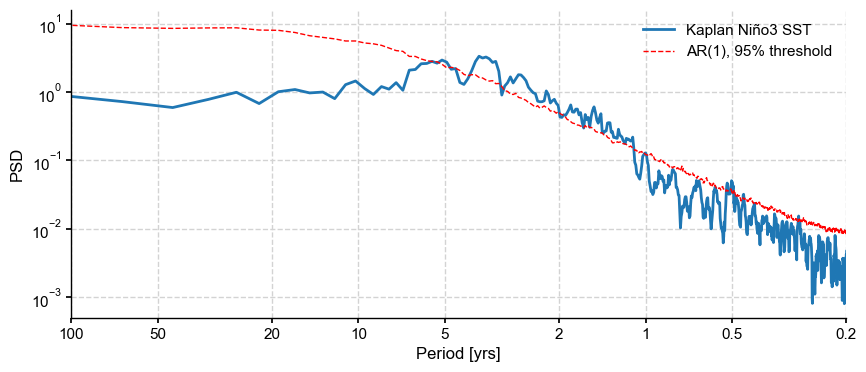

In [9]:
fig, ax = psd_mtm_signif.plot()

For more details, see the *L2_spectral_analysis.ipynb* notebook.

### Step 4: Wavelet Analysis

The current version of *Pyleoclim* supports the `wwz` method for wavelet analysis on unevenly-spaced records and the `cwt` method for evenly-spaced records. `wwz` is more flexible than `cwt` in the sense that it can be used on any record, but is much slower (no free lunch!). To perform wavelet analysis we simply call the `wavelet()` method, which will in turn create a `Scalogram` object. Since our data is evenly spaced, we'll use `cwt`, which is the default:

In [10]:
scal = ts_nino_std.wavelet() 

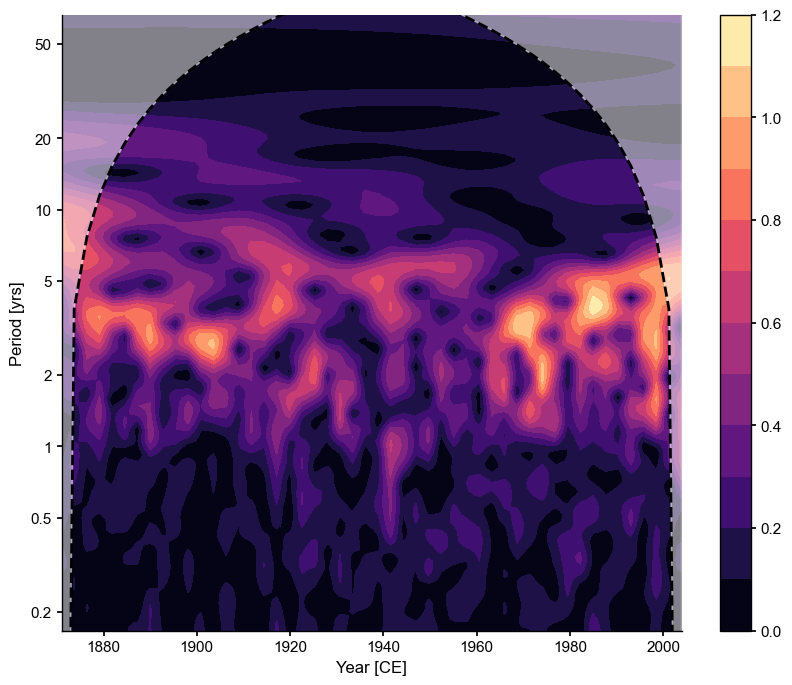

In [11]:
fig, ax = scal.plot() 

Notice how the title got built automatically from the figure metadata.  We can also perform significance analysis the same way we did when conducting spectral analysis:

In [12]:
scal_signif = ts_nino_std.wavelet().signif_test()

Performing wavelet analysis on individual series:   0%|                                                                  | 0/200 [00:00<?, ?it/s]

Performing wavelet analysis on individual series:   0%|▎                                                         | 1/200 [00:03<12:42,  3.83s/it]

Performing wavelet analysis on individual series:   1%|▌                                                         | 2/200 [00:08<13:19,  4.04s/it]

Performing wavelet analysis on individual series:   2%|▊                                                         | 3/200 [00:12<13:29,  4.11s/it]

Performing wavelet analysis on individual series:   2%|█▏                                                        | 4/200 [00:16<14:07,  4.32s/it]

Performing wavelet analysis on individual series:   2%|█▍                                                        | 5/200 [00:21<13:57,  4.30s/it]

Performing wavelet analysis on individual series:   3%|█▋                                                        | 6/200 [00:25<13:27,  4.16s/it]

Performing wavelet analysis on individual series:   3%|█▋                                                        | 6/200 [00:25<13:51,  4.29s/it]

KeyboardInterrupt: 

In this case, regions of significance (those that exceed the 95% confidence threshold found using AR1 surrogates) will be outlined in white.

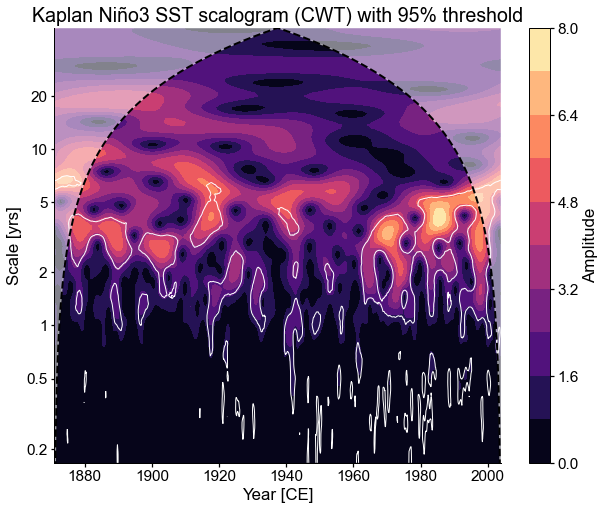

In [14]:
fig, ax = scal_signif.plot()

For more details, see the *L2_wavelet_analysis.ipynb* notebook.

### One more thing: method cascading

Life is short. `Pyleoclim` provides a very cool feature to make life a little bit easier: "method cascading". This feature allows us to string together the steps of a multi-step workflow in just one line.

Performing spectral analysis on individual series: 100%|█| 200/200 [00:11<00:00,


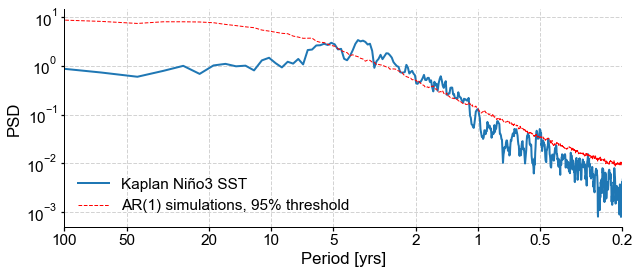

In [15]:
#Spectral analysis with a significance test
fig, ax = ts_nino.standardize().spectral(method='mtm').signif_test().plot()

Performing wavelet analysis on individual series: 100%|█| 200/200 [00:03<00:00, 


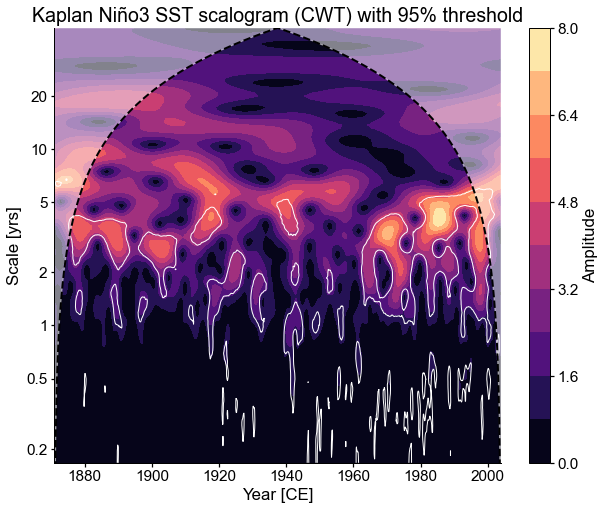

In [16]:
#Wavelet analysis with significance test
fig, ax = ts_nino.standardize().wavelet().signif_test().plot()

If you think some of this could serve your goals, try the other notebooks in this repository.